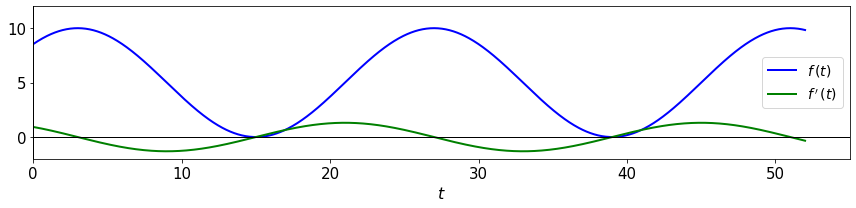

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

#xt=np.linspace(-4*np.pi,4*np.pi,num=500)
xt=np.linspace(0,52,num=1000)
##
fig, ax = plt.subplots(figsize=(12, 3))

fun = 5 + 5*np.cos((np.pi/12)*(xt-3))
dfun = -(5*np.pi/12)*np.sin((np.pi/12)*(xt-3))

ax.plot(xt, fun, color='b', lw=2, label='$f\,(t)$')
ax.plot(xt, dfun, color='g', lw=2, label="$f\,'\,(t)$")
ax.tick_params(axis='both', labelsize= 15)
ax.set_xlabel('$t$', fontsize = 16)
ax.legend(fontsize=14)  

ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

ax.set_xlim(0,55)
ax.set_ylim(-2,12)

#ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

fig.tight_layout()
fig.savefig('func_diff.png')

# 06 - Analysing change, continuously


## Average rate of change

Watch this [video](https://web.microsoftstream.com/video/2953e661-e1c1-43ff-ba78-ca52099ed1ec)
for a short introduction to this lecture.

## Instantaneous rate of change  
  
  

If we have a continuous function $f(x)$, for each two points $x_{0}$ and $x_{1}$, we can define the average rate of change between these points by the ratio between how much $f$ has changed and how much $x$ has changed:  
  
$$\frac{\Delta f(x)}{\Delta x} = \frac{f(x_{1}) - f(x_{0})}{x_{1} - x_{0}}$$  
  
For points $x_{0}$ and $x_{1}$ this can be graphically represented by:  
  
```{image} sec_tan.png
```  
  
The line that passes through the points $(x_0, f(x_0))$ and $(x_1, f(x_1))$ (yellow line) is named *secant line*. As we have seen before in our treatment of linear functions, the slope of the secant line will be given by the average rate of change between this points (remember that the slope for linear functions is defined as $m=\displaystyle\frac{\Delta y}{\Delta x})$.
  
Now consider that we change the value of $x_1$ so that it slowly approaches $x_0$ from the right. In this case, the secant lines also change (from yellow to red), as we change the image of $x_1$ the function, $f(x_1)$. In the limit where $x_1$ is very close to $x_0$, the secant line approaches the *tangent* (sark red line) of the function $f(x)$ at the point $x_0$ (the tangent is the straight line that "just touches" the curve at that point).  
  
If we represent the slope of the tangent line at the point $x_0$ by the term $f'(x_0)$, we will have:  
  
$$\lim_{x_{1} \to x_{0}} \frac{\Delta f(x)}{\Delta x} = \frac{f(x_{1}) - f(x_{0})}{x_{1} - x_{0}} = f'(x_{0})$$  
  
Since we can do the same process as we change the value $x_0$, we define a new function $f'(x_{0})$ which we call the **derivative** of the function $f$ at the point $x_0$, and its value tells us about the *instantaneous* rate of change of $f$ at the point $x_0$.  
  
If we look instead at the interval between $x_{0}$ and $x_{1}$ and define $h = x_1 - x_0$, if $x_1$ approaches $x_0$, then $h$ approaches $0$. and we would have for the derivative of $f(x)$:  
  
$$\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} = f'(x)$$  

Visit this [link](https://www.demonstrations.wolfram.com/SecantAndTangentLines/) for an interactive demonstration of the limit of the tangent curve.
  
``````{note}  
Note that in the previous expression the index $0$ was omitted from $x_0$. We will assume that the derivative is defined for all the points in the domain of the function $f(x)$ for which the limit in the expression exists. 

It is good to have a graphical intuition for when the derivative is not well defined. Some cases are shown below.  
  
`````{tabbed} Case 1   

````{panels}  
  
```{image} ./cases01a.png  

```  
  
```{image} ./cases01b.png  

``` 

---  
  
For the points where the function $f(x)$ presents discontinuities, or for the points where it is simply not defined, the derivative will also not be defined.

  
````  
`````  
  
`````{tabbed} Case 2   

````{panels}  
  
```{image} ./cases02.png  

```  

---  
  
For the points where the curve of the function $f(x)$ presents kinks, note that there are two tangent lines, one coming from the right (red line) and another coming from the left (yellow line). Since the function $f'(x)$ must have only one value for the image of $x$ (in other words, only one value for the slope of the tangent at point $f(x)$), then the derivative is not defined in this case.
  
````  
`````  
  
`````{tabbed} Case 3

````{panels}  
  
```{image} ./cases03.png  

```  

---  

For the points where the function $f(x)$ is locally vertical (in this case, for $x=0$), the slope of the tangent curve is infinite. Since infinite is not a real number, the derivative is not defined for those points.
  
````  
`````  

``````  
  
  
````{admonition} Example  
  
By the definition of the derivative of $f(x)$:  
  
$$f'(x)=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$  
  
Thus, if $f(x)=x^2$, we will have:  
  
$$f'(x)=\lim_{h \to 0} \frac{(x + h)^{2} - x^{2}}{h} = \lim_{h \to 0} \frac{x^{2} + 2xh + h^{2} - x^{2}}{h} = \lim_{h \to 0} (h + 2x) = 2x$$  
  
So that the derivative of $f(x)=x^2$ is the function $f'(x)=2x$.  
  
  
```{note}  
Although limits of functions can be defined in a more rigorous way, in this course we will treat them more intuitively, and use, if required, the known rules for limits. Thus, if $C$ is a constant, $\lim_{x \rightarrow a} f(x) = L$, and $\lim_{x \rightarrow a} g(x) = M$, it is generally valid that:  
  
$$\lim_{x \rightarrow a} [f(x) + g(x)] = \lim_{x \rightarrow a} f(x) + \lim_{x \rightarrow a} g(x) = L + M$$  
$$\lim_{x \rightarrow a} [Cf(x)] = C\lim_{x \rightarrow a} f(x) = CL$$  
$$\lim_{x \rightarrow a} [f(x)g(x)] = [\lim_{x \rightarrow a} f(x)][\lim_{x \rightarrow a} g(x)] = LM$$  
$$\lim_{x \rightarrow a} \left[\frac{f(x)}{g(x)}\right] = \frac{\lim_{x \rightarrow a} f(x)}{\lim_{x \rightarrow a} g(x)} = \frac{L}{M},\ \ (\mbox{if}\ M \ne 0)$$  
$$\lim_{x \rightarrow a} [C^{f(x)}] = C^{\lim_{x \rightarrow a} f(x)} = C^L$$  

```
  
````
  
  
Other common notations for the derivative are given by:  
  
$$f'(x) = \frac{df}{dx} = \frac{d}{dx}f(x) = \dot{f}(x)$$  

```{Example}
Derivatives (or rate of change) are needed everywhere in science. Some common examples are the velocity as the derivative of position and acceleration as the derivative of velocity. When asking yourself 'how fast is the population growing?' or 'how steep is this mountain?' you can find the answer by calculating the derivative of the population number or the height profile.
```

Visit this [link](https://the-learning-machine.com/article/calculus/derivatives) for examples that provide demonstrations of the intuitive interpretation of the derivative.

## Calculating derivatives  
  
  
It is possible to generalise the previous example for $f(x)=x^2$ and obtain the derivative for any power function $f(x)=x^n$ ($n \ne 0$):  
  
$$f(x) = x^{n} \implies f'(x) = nx^{n-1}$$  
  
  
```{admonition} Example  
  
$$x^{2} \implies 2x^{2-1} = 2x$$
$$\ x^{3} \implies 3x^{3-1} = 3x^{2}$$
$$\ x^{4.2} \implies 4.2x^{4.2-1} = 4.2x^{3.2}$$  

```  
  
It is possible to show, from the definition of derivative and the rules for limits, that there are simple rules for derivatives when calculating them for a sum of functions or a product by a constant. If $C$ is a constant, we generally have:  
  
$$\begin{align}\frac{d}{dx}[f(x)+g(x)] &= \frac{df}{dx} + \frac{dg}{dx} \\
   \frac{d}{dx}[Cf(x)] &= C\frac{df}{dx}\end{align}$$  
  
  
Thus, differentiating a given polynomial p(x) stands for differentiating each term separately and summing the result.  
  
```{admonition} Example  
  $$f(x) = 3x^{2} - 4x + 6 \implies f'(x) = 3(2x) - 4(x^{0}) + 0 = 6x - 4$$  
  $$f(x) = x^{60} - 3x^{20} - 4x \implies f'(x) = 60x^{59} - 60x^{19} - 4$$
```  
  
For products and quotients of functions, however, we have different rules:  
  
$$\frac{d}{dx}[f(x)g(x)] = \left(\frac{df}{dx}\right) g(x) + f(x)\left(\frac{dg}{dx}\right)$$  
$$\frac{d}{dx}\left[\frac{f(x)}{g(x)}\right] = \frac{\left(\displaystyle\frac{df}{dx}\right)g(x) - f(x)\left(\displaystyle\frac{dg}{dx}\right)}{[g(x)]^{2}}$$  

```{tip}
If you do not want to remember the quotients rule, you can use the product rule on $f(x)j(x)$, with $j(x)=g(x)^{-1}$ and use the chain rule to evaluate $\frac{d}{dx} j(x)$.
```
  
```{admonition} Examples  
  $$f(x) = (x + 2)(x - 4) \implies f'(x) = (1)(x-4) + (x+2)(1) = x - 4 + x + 2 = 2x - 2$$  
  $$f(x) = \frac{\alpha x}{1 + \beta x} \implies f'(x) =  \frac{(\alpha)(1 + \beta x) - (\alpha x)(\beta)}{(1 + \beta x)^{2}} = \frac{\alpha + \alpha\beta x - \alpha \beta x}{(1 + \beta x)^{2}} =\frac{\alpha}{(1 + \beta x)^{2}}$$  
  
```  
  
Moreover, expressions for the derivatives of the other elementary functions can also be found:

- $f(x) = a^{x} \implies f'(x) = a^{x} \cdot (\ln a) ,\ (a > 0, a \neq 1)$  
    $\left(\mbox{in particular: }\ (e^{x})' = e^{x}\right)$  
    
- $f(x) = \log_{a}x \implies f'(x) = \displaystyle\frac{1}{(\ln a)x}$  
    $\left(\mbox{in particular: }\ (\ln x)' = \displaystyle\frac{1}{x}\right)$  
    
- $f(x) = \mbox{sin}(x) \implies f'(x) = \mbox{cos}(x)$  

- $f(x) = \mbox{cos}(x) \implies f'(x) = -\mbox{sin}(x)$
  
  
```{admonition} Example  
If $f(x) = \mbox{tan}(x) = \displaystyle\frac{\mbox{sin}(x)}{\mbox{cos}(x)}$, then:  
  
$$f'(x) = \frac{(\mbox{cos}(x))\mbox{cos}(x) - \mbox{sin}(x)(-\mbox{sin}(x))}{(\mbox{cos}(x))^{2}} = \frac{\mbox{sin}^{2}(x) + \mbox{cos}^{2}(x)}{\mbox{cos}^{2}(x)} = \frac{1}{\mbox{cos}^{2}(x)} = \mbox{sec}^{2}(x)$$

## Chain rule  
  
The calculation of derivatives for more complicated functions can generally be made easier by breaking the function into components, for example:  
  
- $f(x) = (3x^{2} - 2x + 1)^{3} = (g(x))^{3}$, where $g(x) = 3x^{2} - 2x + 1$
- $f(x) = \displaystyle\frac{\sqrt{2x - 1}}{1 + \sqrt{2x - 1}} = \displaystyle\frac{g(x)}{1 + g(x)}$, where $g(x) = \sqrt{h(x)}$, and $h(x) = 2x - 1$  
  
We have seen this before when discussing transformation of graphs.  When one function is nested within the other, we have a composite function, or as for the last example above:

$$f(x) = f(g(h(x)))$$  
  
The derivative of composite functions in relation to the dependent variable is then given by the *chain rule*:  
  
- $\displaystyle\frac{d}{dx}f(x) = \displaystyle\frac{d}{dx}f(g(x)) = \left(\displaystyle\frac{df}{dg}\right)\left(\displaystyle\frac{dg}{dx}\right)$
- $\displaystyle\frac{d}{dx}f(x) = \displaystyle\frac{d}{dx}f(g(h(x))) = \left(\displaystyle\frac{df}{dg}\right) \left(\displaystyle\frac{dg}{dh}\right) \left(\displaystyle\frac{dh}{dx}\right)$  
  
The strategy then consists in identifying the nested functions, calculating their derivatives and multiplying the results.  
  
```{admonition} Examples  
  
- If $f(x) = (3x^{2} - 2x + 1)^{3}$, we have:  
      
    $$f(g) = g^{3} \implies \displaystyle\frac{df}{dg} = 3g^2$$
    $$g(x) = 3x^{2} - 2x + 1 \implies \displaystyle\frac{dg}{dx} = 6x - 2$$  
    
    Thus:  
      
    $$\displaystyle\frac{df}{dx} = \left(\displaystyle\frac{df}{dg}\right)\left(\displaystyle\frac{dg}{dx}\right) = 3g^{2} \cdot g' = 3(3x^{2} - 2x + 1)^2(6x - 2)$$  
      
    <br />  
      
- If $f(x) = \displaystyle\frac{\sqrt{2x - 1}}{1 + \sqrt{2x - 1}}$, then:  
      
    $$f(g) = \displaystyle\frac{g}{1+g} \implies \displaystyle\frac{df}{dg} = \frac{(1+g) - g}{(1+g)^2} = \frac{1}{(1+g)^2}$$  
    $$g(h) = \sqrt{h} \implies \displaystyle\frac{dg}{dh} = \frac{1}{2}h^{-1/2}$$  
    $$h(x) = 2x-1 \implies \displaystyle\frac{dh}{dx} = 2$$  
      
    Thus:  
      
    $$\displaystyle\frac{df}{dx} =  \left(\displaystyle\frac{df}{dg}\right) \left(\displaystyle\frac{dg}{dh}\right) \left(\displaystyle\frac{dh}{dx}\right) = \frac{1}{(1+\sqrt{2x - 1})^2}\cdot \frac{1}{2(\sqrt{2x - 1})}\cdot 2 = \frac{1}{(\sqrt{2x - 1})(1+\sqrt{2x - 1})^2}$$  
      
    <br />
      
- If $f(t) = 5 + 5\mbox{cos}\left[\displaystyle\frac{\pi}{12}(t - 3)\right]$, we have:  
      
    $$f(g) = 5 + 5g \implies \displaystyle\frac{df}{dg} = 5$$  
    $$g(h) = \mbox{cos}(h) \implies \displaystyle\frac{dg}{dh} = -\mbox{sin}(h)$$  
    $$h(t) = \frac{\pi}{12}(t - 3) \implies \displaystyle\frac{dh}{dt} = \frac{\pi}{12}$$  
      
    Thus:  
      
    $$\displaystyle\frac{df}{dx} =  \left(\displaystyle\frac{df}{dg}\right) \left(\displaystyle\frac{dg}{dh}\right) \left(\displaystyle\frac{dh}{dx}\right) = 5 \cdot \left(-\mbox{sin}(h)\right) \cdot \frac{\pi}{12} = -\frac{5\pi}{12}\mbox{sin}\left[\displaystyle\frac{\pi}{12}(t - 3)\right]$$  
      
    For this last example if we plot the function $f(t)=5 + 5\mbox{cos}\left[\displaystyle\frac{\pi}{12}(t - 3)\right]$ together with its derivative $f'(t)=-\displaystyle\frac{5\pi}{12}\mbox{sin}\left[\displaystyle\frac{\pi}{12}(t - 3)\right]$ we will have:  
      
    ```{image} func_diff.png  
    ```  
      
    Try to compare the two graphs. What happens with the function $f(t)$ on the intervals where the derivative $f'(t)$ is positive or negative? What happens at the points where the derivative is zero?

## Higher order derivatives  
  


If the derivative of a given function is also a "well-behaved" function (without kinks or discontinuities), then we can also calculate the derivative of the derivative. Thus:  
  
$$\frac{d}{dx}\left(\frac{df}{dx}\right) = \frac{d^{2}f}{dx^{2}} = f''(x)$$  
  
The function $f''(x)$ is called the *second derivative* with respect to $x$.  
  
We can continue this process and get higher-order derivatives:  
  
$$\frac{d^{n}f}{dx^{n}} = f^{(n)}(x),$$  
  
assuming again that these functions are also well-behaved. Function $f^{(n)}(x)$ is called the $n$-th derivative of $f$ with respect to $x$ (note the parenthesis on $(n)$ to distinguish from powers of $f$).  

```{admonition} Examples
The velocity is the derivative of the position, and the acceleration is the derivative of the velocity. Therefore, acceleration is the second-order derivative of the position
```

```{admonition} Examples  
  
- $f(x) = 3x^{2} - 6x + 2$, then:  
      
    $$f'(x) = 6x - 6$$  
    $$f''(x) = 6$$  
      
    Polynomials are always well-behaved and they are infinitely differentiable. However, if $n$ is the degree of the polynomial (*i.e.* the largest exponent in the polynomial), we will have: $p^{(k)}(x) = 0,\ \mbox{for}\ k \ge n+1$.  
    
    <br />
      
- $f(x) = e^{-x^{2}}$, then:  
      
    $$f'(x) = e^{-x^{2}} \cdot (-2x) = -2xe^{-x^{2}}$$  
      
    $$\begin{align}f''(x)
&= -2[e^{-x^{2}} + x(-2x)(e^{-x^{2}})] \\
&= -2e^{-x^{2}} + 4x^{2}e^{-x^{2}} \\
&= -2e^{-x^{2}}(1 - 2x^{2})\end{align}$$  
  
```  
  

## Functions of several variables  
  
A function $z = f(x,y)$ of two dependent variables $x$ and $y$ defines a surface on the three dimensional $xyz$-space. If this function is well-behave it will be smooth, like if we applied different deformations on a rubber sheet. For smooth functions, we can calculate derivatives with respect to each of the dependent variables. This is written as:  
  
$$ \frac{\partial f}{\partial x} \text{ or } \frac{\partial f}{\partial x}(x, y) \text{ or } \frac{\partial}{\partial x}f(x,y)$$  
  
$$\frac{\partial f}{\partial y}, \frac{\partial f}{\partial{y}}(x,y), \frac{\partial}{\partial y}f(x,y)$$  
  
The partial derivative informs us how the function $f$ varies along the $x$ (or the $y$) direction at a specific point.  
  
```{admonition} Example  
Consider $f(x,y) = 4x^2y-2xy^3$. To compute the partial derivative with respect to $x$ we consider all terms in $y$ constants, and calculate the derivative as usual. For the partial derivative with respect to $y$, we consider the $x$ terms constant. We have:  
  
$$\frac{\partial f}{\partial x} = (4y) \cdot (2x) - 2y^{3} \cdot (1) = 8xy - 2y^{3}$$  
$$\frac{\partial f}{\partial y} = 4x^{2} - 2x(3y^{2}) = 4x^{2} - 6xy^{2}$$
```  
  
Higher order partial derivatives can also be defined, and represented with the common notations:  
  
$$\frac{\partial}{\partial x}\left(\frac{\partial f}{\partial x}\right) = \frac{\partial^{2}f}{\partial x^{2}} = \partial_{xx} f = f_{xx}(x,y)$$
$$\frac{\partial}{\partial y}\left(\frac{\partial f}{\partial y}\right) = \frac{\partial^{2}f}{\partial y^{2}} = 
\partial_{yy} f = f_{yy}(x,y)$$  
  
  
with subscripts representing the variable and the order of differentiation.  
  

For well-behaved functions, the order of the variables chosen to differentiate does not matter (a special case of what is called Schwarz's theorem):  
  
$$f_{yx}(x,y) = \frac{\partial}{\partial y}\left(\frac{\partial f}{\partial x}\right) = \frac{\partial^{2}f}{\partial y \partial x} = \frac{\partial^{2} f}{\partial x \partial y}= \frac{\partial}{\partial x}\left(\frac{\partial f}{\partial y}\right) = f_{xy}(x,y)$$

```{admonition} Example 
Often, a quantity of interest does not depend only on one variable but on many. The population size of a species depends on various aspects, including the availability of food, the number of predators, and other environmental factors.
```